# Amazon Fine Food Reviews: EDA

## Objective

Analysing the data & plot the required graphs to show that these conclusions are true:
<pre>
a. Positive reviews are very common.
b. Positive reviews are shorter.
c. Longer reviews are more helpful.
d. Despite being more common and shorter, positive reviews are found more helpful.
e. Frequent reviewers are more discerning in their ratings, write longer reviews, and write more helpful reviews
</pre>

## Loading the Data

In [2]:
#Let's import pandas to read the csv file.
import pandas as pd
df = pd.read_csv("Reviews.csv")

In [3]:
#Printing first 5 columns from our data frame
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#Observing the lables of each column
print(df.keys())

Index([u'Id', u'ProductId', u'UserId', u'ProfileName', u'HelpfulnessNumerator',
       u'HelpfulnessDenominator', u'Score', u'Time', u'Summary', u'Text'],
      dtype='object')


In [5]:
#Observing the shape of our data frame.
df.shape
# Note: We have 10 features and 568454 data points.

(568454, 10)

In [6]:
#Lets check for missing values
df.info()
#Observe that there are some missing values in 'PROFILENAME' & 'SUMMARY' column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568428 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df.describe()
#Observe that more than 75% of our data is belonging to positive /
#class, i.e. we have imbalanced dataset.

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
#Lets do the value count on 'Scores'.
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

## Exploratory Data Analysis

Till now we saw that 5-star reviews constitute a large proportion (64%) of all reviews. The next most prevalent rating is 4-stars(14%), followed by 1-star (9%), 3-star (8%), and finally 2-star reviews (5%).<br />
Note that we have 10 features and 568454 data points. There are some missing values in 'PROFILENAME' & 'SUMMARY' column. More than 75% of our data is belonging to positive class(Score=4,5), i.e. we have imbalanced dataset.

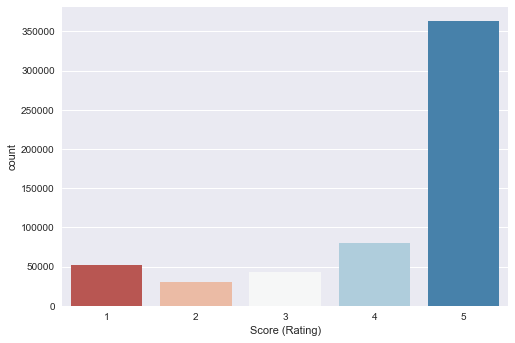

In [9]:
#Importing Seaborn and Matplotlib for graphical effects.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='Score', data=df, palette='RdBu')
plt.xlabel('Score (Rating)')
plt.show()

## Creating a new dataframe

In [10]:
#copying the original dataframe to 'temp_df'.
temp_df = df[['UserId','HelpfulnessNumerator','HelpfulnessDenominator', 'Summary', 'Text','Score']].copy()

#Adding new features to dataframe.
temp_df["Sentiment"] = temp_df["Score"].apply(lambda score: "positive" if score > 3 else \
                                              ("negative" if score < 3 else "not defined"))
temp_df["Usefulness"] = (temp_df["HelpfulnessNumerator"]/temp_df["HelpfulnessDenominator"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                        n <= 0.75 else "useless")))

temp_df.loc[temp_df.HelpfulnessDenominator == 0, 'Usefulness'] = ["useless"]
# Removing all rows where 'Score' is equal to 3
#temp_df = temp_df[temp_df.Score != 3]
#Lets now observe the shape of our new dataframe.
temp_df.shape

(568454, 8)

In [11]:
temp_df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score
count,568454.000000,568454.00000,568454.000000
mean,1.743817,2.22881,4.183199
std,7.636513,8.28974,1.310436
min,0.000000,0.00000,1.000000
25%,0.000000,0.00000,4.000000
50%,0.000000,1.00000,5.000000
75%,2.000000,2.00000,5.000000
max,866.000000,923.00000,5.000000


In [12]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 8 columns):
UserId                    568454 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Summary                   568428 non-null object
Text                      568454 non-null object
Score                     568454 non-null int64
Sentiment                 568454 non-null object
Usefulness                568454 non-null object
dtypes: int64(3), object(5)
memory usage: 34.7+ MB


In [13]:
#Lets view the dataframe when Score=5
temp_df[temp_df.Score == 5].head(10)

,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score,Sentiment,Usefulness
0,A3SGXH7AUHU8GW,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,positive,>75%
4,A1UQRSCLF8GW1T,0,0,Great taffy,Great taffy at a great price. There was a wid...,5,positive,useless
6,A1SP2KVKFXXRU1,0,0,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,5,positive,useless
7,A3JRGQVEQN31IQ,0,0,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,5,positive,useless
8,A1MZYO9TZK0BBI,1,1,Yay Barley,Right now I'm mostly just sprouting this so my...,5,positive,>75%
9,A21BT40VZCCYT4,0,0,Healthy Dog Food,This is a very healthy dog food. Good for thei...,5,positive,useless
10,A3HDKO7OW0QNK4,1,1,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,5,positive,>75%
11,A2725IB4YY9JEB,4,4,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,5,positive,>75%
14,A2MUGFV2TDQ47K,4,5,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,5,positive,>75%
15,A1CZX3CP8IKQIJ,4,5,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...,5,positive,>75%


## Positive reviews are very common

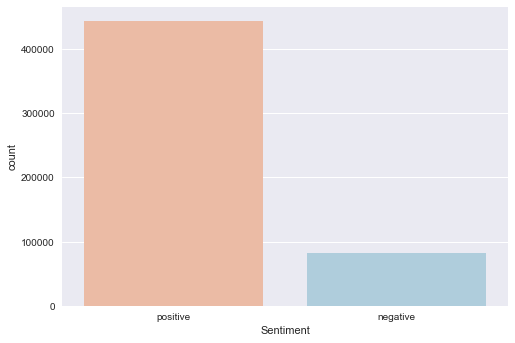

In [14]:
sns.countplot(x='Sentiment', order=["positive", "negative"], data=temp_df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

In [15]:
temp_df.Sentiment.value_counts()

positive       443777
negative        82037
not defined     42640
Name: Sentiment, dtype: int64

Therefore we could conclude that the positive reviews are way more than the negative reviews.

## Popular words in Review

A look at the post popular words in positive (4-5 stars) and negative (1-2 stars) reviews shows that both positive and negative reviews share many popular words, such as "coffee", "taste", "flavor", "price", "good", and "product." The words "good", "great", "love", "favorite", and "find" are indicative of positive reviews, while negative reviews contain words such as "didn't" and "disappointed", but these distinguishing words appear less frequently than distinguishing words in positive reviews.

In [16]:
pos = temp_df.loc[temp_df['Sentiment'] == 'positive']
pos = pos[0:25000]

neg = temp_df.loc[temp_df['Sentiment'] == 'negative']
neg = neg[0:25000]

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt


def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["Summary"]:
        text = str(val).lower()
        tokens = []
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + ' ' + words
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

C:\Users\Kanav\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  from ipykernel import kernelapp as app


In [24]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='w', bbox_inches='tight')

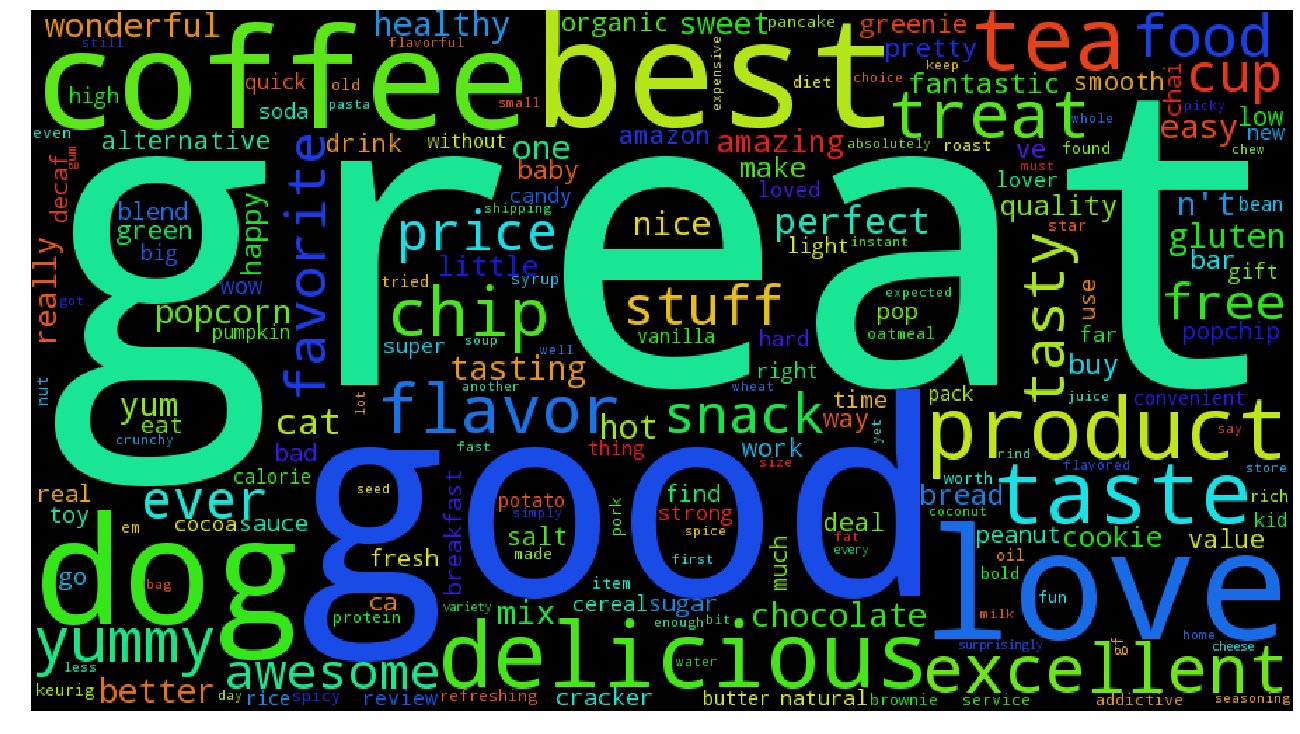

In [25]:
#Visuallizing popular positive words
plot_Cloud(pos_wordcloud)

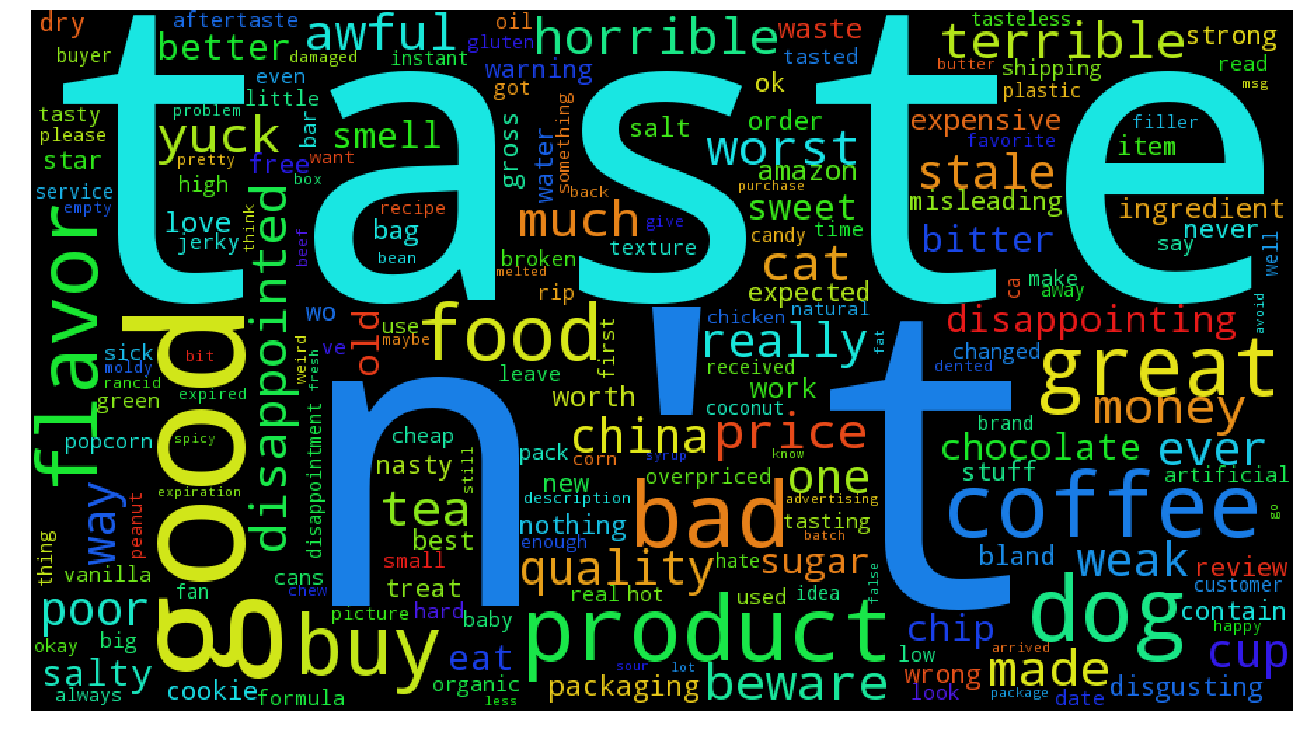

In [26]:
#Visuallizing popular negative words
plot_Cloud(neg_wordcloud)

## Helpfulness

### How many reviews are helpful?

Among all reviews, almost half (50%) are not voted on at all.<br />
Among reviews that are voted on, helpful reviews(>75%) are the most common

In [27]:
#Checking the value count for 'Usefulness'
temp_df.Usefulness.value_counts()

useless    270052
>75%       202836
25-75%      57286
<25%        38280
Name: Usefulness, dtype: int64

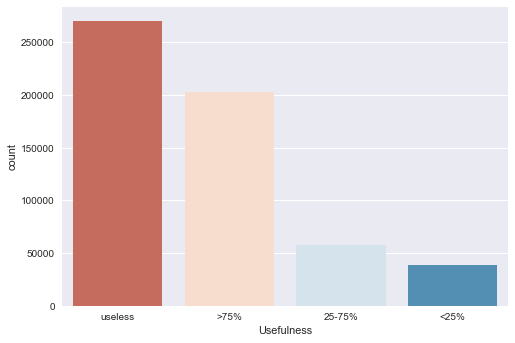

In [28]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=temp_df, palette='RdBu')
plt.xlabel('Usefulness')
plt.show()

### Positive reviews are found more helpful

As the rating becomes more positive, the reviews become more helpful (and less unhelpful).

In [29]:
temp_df[temp_df.Score==5].Usefulness.value_counts()

useless    186743
>75%       142954
25-75%      21314
<25%        12111
Name: Usefulness, dtype: int64

In [30]:
temp_df[temp_df.Score==2].Usefulness.value_counts()

useless    10604
>75%        7423
25-75%      6693
<25%        5049
Name: Usefulness, dtype: int64

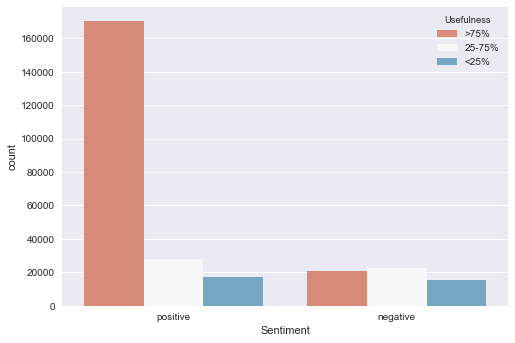

In [31]:
sns.countplot(x='Sentiment', hue='Usefulness', order=["positive", "negative"], \
              hue_order=['>75%', '25-75%', '<25%'], data=temp_df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

Therefore positive reviews are more helpful.

## Word Count

In [32]:
temp_df["text_word_count"] = temp_df["Text"].apply(lambda text: len(text.split()))

In [33]:
temp_df.head()

,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score,Sentiment,Usefulness,text_word_count
0,A3SGXH7AUHU8GW,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,positive,>75%,48
1,A1D87F6ZCVE5NK,0,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,negative,useless,31
2,ABXLMWJIXXAIN,1,1,"""Delight"" says it all",This is a confection that has been around a fe...,4,positive,>75%,94
3,A395BORC6FGVXV,3,3,Cough Medicine,If you are looking for the secret ingredient i...,2,negative,>75%,41
4,A1UQRSCLF8GW1T,0,0,Great taffy,Great taffy at a great price. There was a wid...,5,positive,useless,27


In [34]:
temp_df[temp_df.Score==5].text_word_count.median()

52.0

In [35]:
temp_df[temp_df.Score==4].text_word_count.median()

65.0

In [36]:
temp_df[temp_df.Score==3].text_word_count.median()

70.0

In [37]:
temp_df[temp_df.Score==2].text_word_count.median()

67.0

In [38]:
temp_df[temp_df.Score==1].text_word_count.median()

62.0

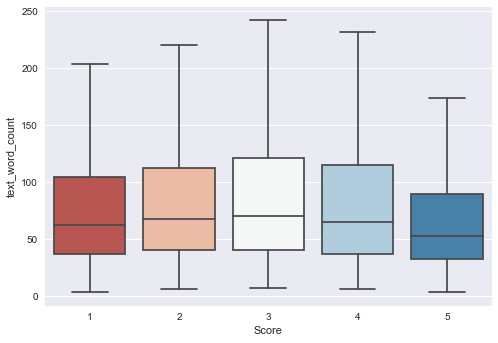

In [39]:
sns.boxplot(x='Score',y='text_word_count', data=temp_df, palette='RdBu', showfliers=False)
plt.show()

Observations: 5-star reviews had the lowest median word count (52 words), while 3-star reviews had the largest median word count (70 words).

### How does word count relate to helpfulness?

The word counts for helpful reviews and not helpful reviews have a similar distribution with the greatest concentration of reviews of approximately 25 words. However, not helpful reviews have a larger concentration of reviews with low word count and helpful reviews have more longer reviews. Helpful reviews have a higher median word count (67 words) than not helpful reviews (54 words).

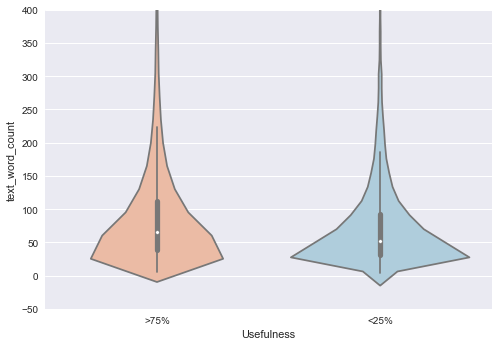

In [40]:
sns.violinplot(x='Usefulness', y='text_word_count', order=[">75%", "<25%"], \
               data=temp_df, palette='RdBu')
plt.ylim(-50, 400)
plt.show()

## Frequency of reviewers

Using User IDs, one can recognize repeat reviewers. Reviewers that have reviewed over 50 products account for over 5% of all reviews in the database. We will call such reviewers frequent reviewers. (The cutoff choice of 50, as opposed to another choice, seemed to not have a larger impact on the results.) I asked: Does the behavior of frequent reviewers differ from that of infrequent reviewers?

In [41]:
x = temp_df.UserId.value_counts()
x.to_dict()
print("converted Series to dictionary")

converted Series to dictionary


In [42]:
temp_df["reviewer_freq"] = temp_df["UserId"].apply(lambda counts: "Frequent (>50 reviews)" \
                                                                 if x[counts]>50 else "Not Frequent (1-50)")

In [43]:
temp_df.head()

,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score,Sentiment,Usefulness,text_word_count,reviewer_freq
0,A3SGXH7AUHU8GW,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,positive,>75%,48,Not Frequent (1-50)
1,A1D87F6ZCVE5NK,0,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,negative,useless,31,Not Frequent (1-50)
2,ABXLMWJIXXAIN,1,1,"""Delight"" says it all",This is a confection that has been around a fe...,4,positive,>75%,94,Not Frequent (1-50)
3,A395BORC6FGVXV,3,3,Cough Medicine,If you are looking for the secret ingredient i...,2,negative,>75%,41,Not Frequent (1-50)
4,A1UQRSCLF8GW1T,0,0,Great taffy,Great taffy at a great price. There was a wid...,5,positive,useless,27,Not Frequent (1-50)


### Are frequent reviewers more discerning?

The distribution of ratings among frequent reviewers is similar to that of all reviews. However, we can see that frequent reviewers give less 5-star reviews and less 1-star review. Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews.

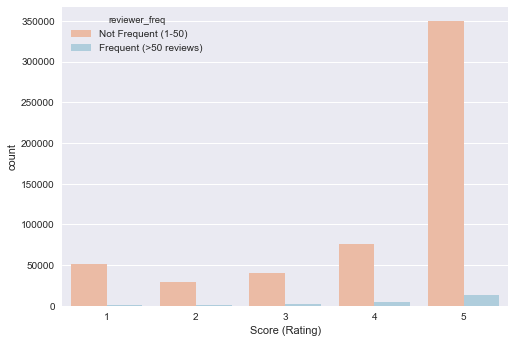

In [44]:
ax = sns.countplot(x='Score', hue='reviewer_freq', data=temp_df, palette='RdBu')
ax.set_xlabel('Score (Rating)')
plt.show()

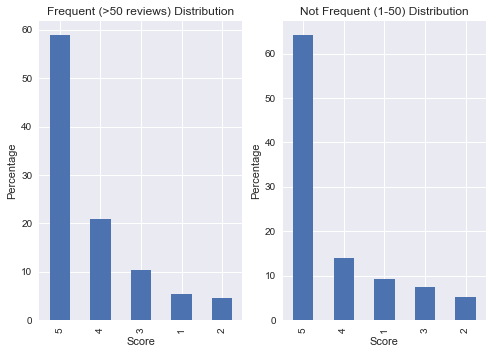

In [45]:
y = temp_df[temp_df.reviewer_freq=="Frequent (>50 reviews)"].Score.value_counts()
z = temp_df[temp_df.reviewer_freq=="Not Frequent (1-50)"].Score.value_counts()

tot_y = y.sum()

y = (y/tot_y)*100

tot_z = z.sum()

z = (z/tot_z)*100

ax1 = plt.subplot(121)
y.plot(kind="bar",ax=ax1)
plt.xlabel("Score")
plt.ylabel("Percentage")
plt.title("Frequent (>50 reviews) Distribution")

ax2 = plt.subplot(122)
z.plot(kind="bar",ax=ax2)
plt.xlabel("Score")
plt.ylabel("Percentage")
plt.title("Not Frequent (1-50) Distribution")
plt.show()

### Are frequent reviewers more helpful?

The distribution of helpfulness for frequent reviewers is similar to that of all reviews. However, frequent reviewers are more likely to have their review voted on and when voted on, more likely to be voted helpful, and less likely to be unhelpful.

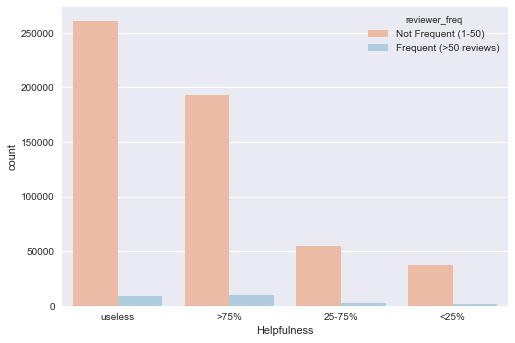

In [46]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], \
              hue='reviewer_freq', data=temp_df, palette='RdBu')
plt.xlabel('Helpfulness')
plt.show()

### Are frequent reviewers more verbose?

The distributions of word counts for frequent and infrequent reviews shows that infrequent reviewers have a large amount of reviews of low word count. On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. Moreover, the median word count for frequent reviewers is higher than the median for infrequent reviewers.

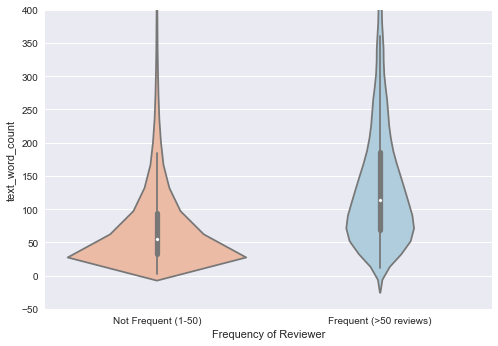

In [47]:
sns.violinplot(x='reviewer_freq', y='text_word_count',  \
               data=temp_df, palette='RdBu')
plt.xlabel('Frequency of Reviewer')
plt.ylim(-50, 400)
plt.show()

## Conclusion

<pre>
a. Positive reviews are very common.
b. Positive reviews are shorter.
c. Longer reviews are more helpful.
d. Despite being more common and shorter, positive reviews are found more helpful.
e. Frequent reviewers are more discerning in their ratings, write longer reviews, and write more helpful reviews
</pre>